In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings

In [57]:
data = [99120.9, 73638, 109252.8, 97790.4, 97315.6, 81806.5, 104023.9, 93112.5, 91100.6, 76598.2, 95368, 84574.1, 
        82323, 69315.5, 85504.1, 75400.5, 73416.5, 61106.8, 78356.3, 71526.7, 70950, 60505.9, 77725.9, 70971.1, 69458.3,
        59127.4, 74211.4, 66748.7, 65130.3, 55861.2]
# data = [109252.8, 97790.4, 97315.6, 81806.5, 104023.9, 93112.5, 91100.6, 76598.2, 95368, 84574.1, 
#         82323, 69315.5, 85504.1, 75400.5, 73416.5, 61106.8, 78356.3, 71526.7, 70950, 60505.9, 77725.9, 70971.1, 69458.3,
#         59127.4, 74211.4, 66748.7, 65130.3, 55861.2]
# second_rate = [60.8, 53.9, 36.8, 35.9, 36.6, 36.3, 34.4, 33.9, 35, 34.4, 34.2, 34.8, 35.4, 33.7, 36, 35.8, 35.6, 33.2, 39.7, 39.2, 39.8, 39.7, 45.6, 46.2, 46.5, 44.7, 48.5, 47.9, 47.1, 45.8
# ]
# second_rate = [36.8, 35.9, 36.6, 36.3, 34.4, 33.9, 35, 34.4, 34.2, 34.8, 35.4, 33.7, 36, 35.8, 35.6, 33.2, 39.7, 39.2, 39.8, 39.7, 45.6, 46.2, 46.5, 44.7, 48.5, 47.9, 47.1, 45.8]
# per_rate = 0.01
data = np.array(data, dtype = np.float) 
data = data[::-1]

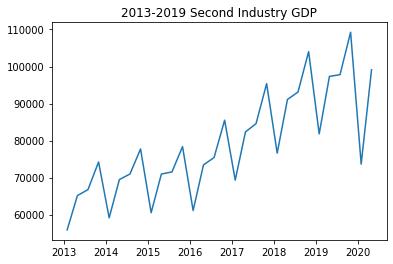

In [58]:
data=pd.Series(data)
data.index = pd.Index(pd.date_range('20130101',periods=30,freq='3M'))


plt.figsize = (12,8)
plt.title('2013-2019 Second Industry GDP')
plt.plot(data)
plt.show()

<Figure size 432x288 with 0 Axes>

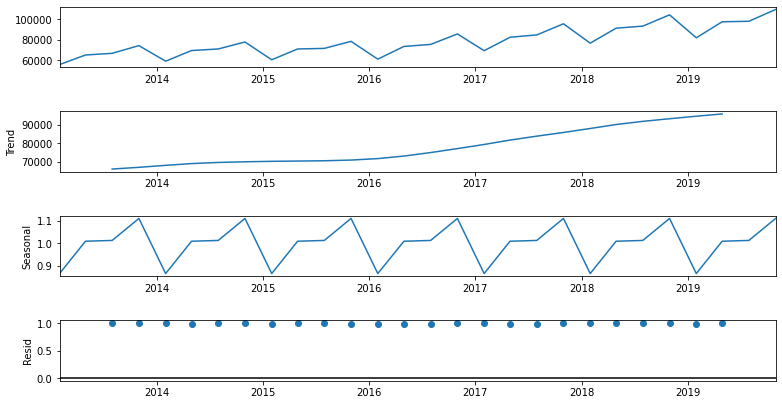

In [37]:
decomposition = seasonal_decompose(data, model='multiplicative', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

<Figure size 432x288 with 0 Axes>

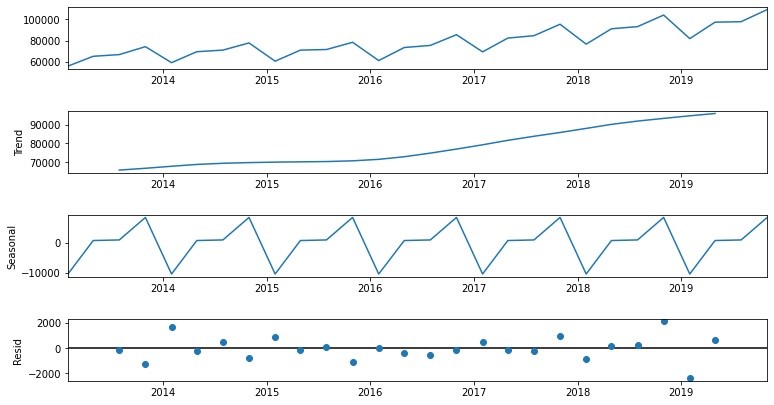

In [38]:
decomposition = seasonal_decompose(data, model='additive', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

In [39]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 4).mean()
    rolstd = timeseries.rolling(window = 4).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    # plt.title('mean and std')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

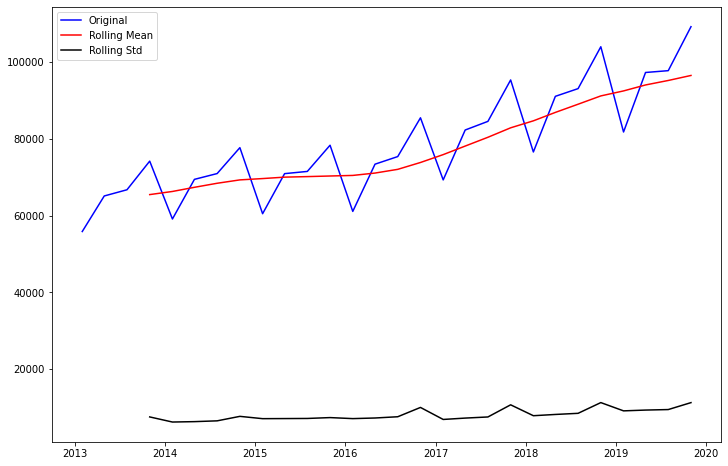

Results of Dickey-Fuller Test:
Test Statistic                  0.321289
p-value                         0.978300
#Lags Used                      5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
dtype: float64
Test Statistic                  0.321289
p-value                         0.978300
#Lags Used                      5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
dtype: float64
Test Statistic                  0.321289
p-value                         0.978300
#Lags Used                      5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [40]:
test_stationarity(data)

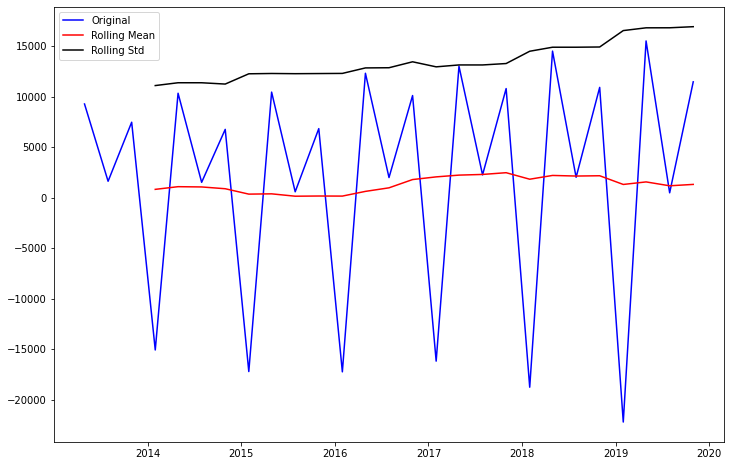

Results of Dickey-Fuller Test:
Test Statistic                 -1.805956
p-value                         0.377509
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
dtype: float64
Test Statistic                 -1.805956
p-value                         0.377509
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
dtype: float64
Test Statistic                 -1.805956
p-value                         0.377509
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


In [41]:
data_diff1 = data.diff(1)
test_stationarity(data_diff1.dropna(inplace=False))

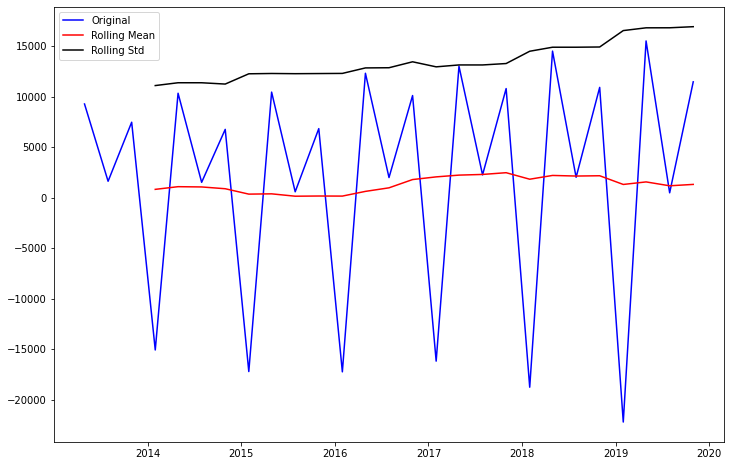

Results of Dickey-Fuller Test:
Test Statistic                 -1.805956
p-value                         0.377509
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
dtype: float64
Test Statistic                 -1.805956
p-value                         0.377509
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
dtype: float64
Test Statistic                 -1.805956
p-value                         0.377509
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


In [42]:
data_diff4 = data.diff(4)
test_stationarity(data_diff1.dropna(inplace=False))

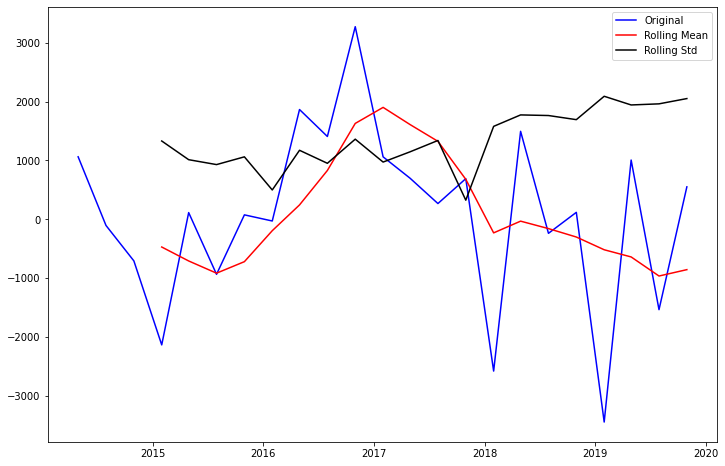

Results of Dickey-Fuller Test:
Test Statistic                 -2.677418
p-value                         0.078028
#Lags Used                      4.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
dtype: float64
Test Statistic                 -2.677418
p-value                         0.078028
#Lags Used                      4.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
dtype: float64
Test Statistic                 -2.677418
p-value                         0.078028
#Lags Used                      4.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [43]:
data_diff1_4 = data_diff1.diff(4)
test_stationarity(data_diff1_4.dropna(inplace=False))

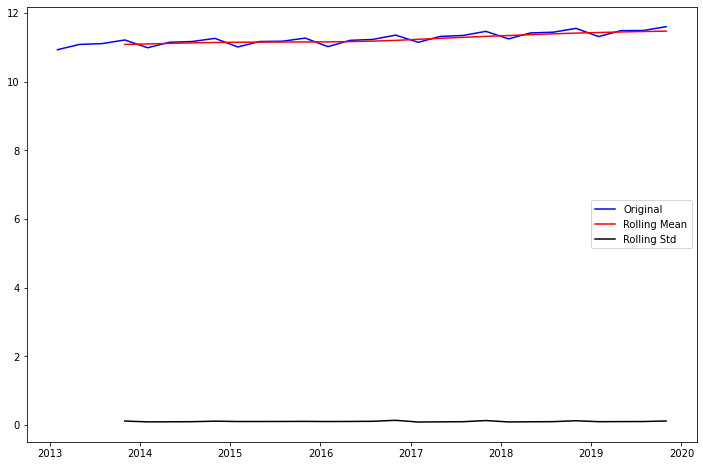

Results of Dickey-Fuller Test:
Test Statistic                  0.786827
p-value                         0.991421
#Lags Used                      6.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
dtype: float64
Test Statistic                  0.786827
p-value                         0.991421
#Lags Used                      6.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
dtype: float64
Test Statistic                  0.786827
p-value                         0.991421
#Lags Used                      6.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [44]:
data_log = np.log(data)
test_stationarity(data_log)

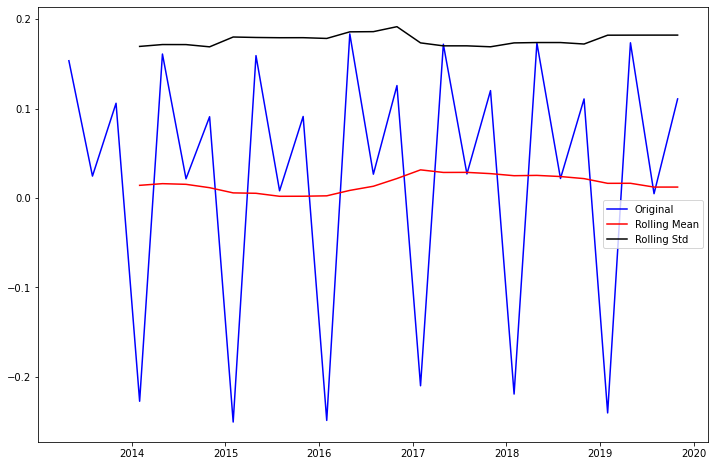

Results of Dickey-Fuller Test:
Test Statistic                 -1.984479
p-value                         0.293420
#Lags Used                      5.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
dtype: float64
Test Statistic                 -1.984479
p-value                         0.293420
#Lags Used                      5.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
dtype: float64
Test Statistic                 -1.984479
p-value                         0.293420
#Lags Used                      5.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [45]:
data_log_1 = data_log.diff(1)
test_stationarity(data_log_1.dropna(inplace=False))

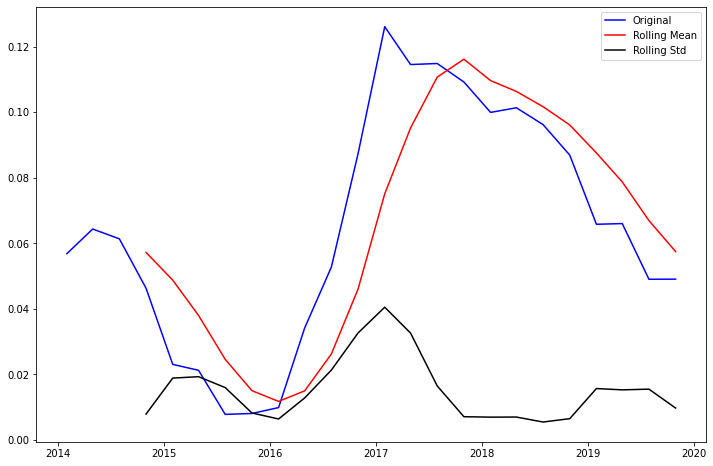

Results of Dickey-Fuller Test:
Test Statistic                 -3.190961
p-value                         0.020514
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
dtype: float64
Test Statistic                 -3.190961
p-value                         0.020514
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
dtype: float64
Test Statistic                 -3.190961
p-value                         0.020514
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [46]:
data_log_4 = data_log.diff(4)
test_stationarity(data_log_4.dropna(inplace=False))

In [50]:
p =d = q = range(0, 3)
# d = [4, 4, 4]
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], 4, x[2], 4) for x in list(itertools.product(p, d, q))]
 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 4, 1, 4)
SARIMAX: (0, 0, 1) x (0, 4, 2, 4)
SARIMAX: (0, 0, 2) x (0, 4, 0, 4)
SARIMAX: (0, 0, 2) x (0, 4, 1, 4)


In [51]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

results = []
best_aic = float("inf")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(data_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            result = model.fit()

            # print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print('wrong parameters:', param_seasonal)
            continue
            
        aic = result.aic
        if aic < best_aic:
            best_result = result
            best_aic = aic
            best_param_seasonal = param_seasonal
            best_param = param
        results.append([param, param_seasonal, result.aic])

result_table = pd.DataFrame(results)
result_table.columns = ['param', 'param_seasonal', 'aic']
print(result_table.sort_values(by='aic', ascending=True).head())
print(best_result.summary()) 

         param param_seasonal        aic
243  (1, 0, 0)   (0, 4, 0, 4) -28.082048
246  (1, 0, 0)   (0, 4, 0, 4) -28.082048
249  (1, 0, 0)   (0, 4, 0, 4) -28.082048
81   (0, 1, 0)   (0, 4, 0, 4) -27.822186
84   (0, 1, 0)   (0, 4, 0, 4) -27.822186
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   28
Model:             SARIMAX(1, 0, 0)x(0, 4, 0, 4)   Log Likelihood                  16.041
Date:                           Wed, 02 Sep 2020   AIC                            -28.082
Time:                                   19:29:34   BIC                            -27.286
Sample:                               01-31-2013   HQIC                           -28.584
                                    - 10-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err  

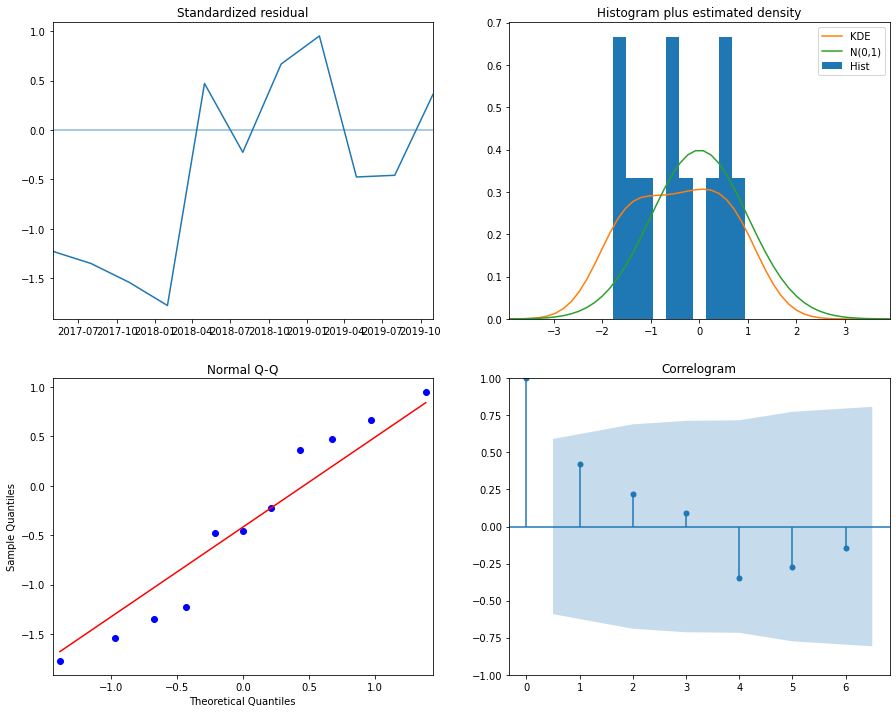

In [52]:
best_result.plot_diagnostics(figsize=(15, 12), lags=6)
plt.show()

In [53]:
pred = best_result.forecast(2)
pred

2020-01-31    11.313350
2020-04-30    11.490281
Freq: 3M, dtype: float64

In [56]:
import math

pred_log_gdp = np.array([11.313350, 11.490281])
pred_gdp_Q2 = np.exp(pred_log_gdp)

print(pred_gdp_Q2)

[81907.8406753  97760.99965924]


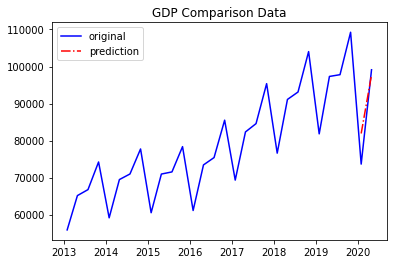

In [59]:
pred_gdp_Q2 = pd.Series(pred_gdp_Q2)
pred_gdp_Q2.index = pd.Index(pd.date_range('20200101',periods=2,freq='3M'))
plt.figsize = (12,8)
plt.plot(data,'b', label='original')
plt.plot(pred_gdp_Q2,'r-.', label='prediction')
plt.title('GDP Comparison Data')
plt.legend()
plt.savefig('fianl')
plt.show()